### Gerekli Kütüphaneleri Yükleme


In [1]:
!pip install python-monascaclient keystoneauth1 urllib3
!pip install matplotlib
!pip install scikit-learn
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from monascaclient import client
from keystoneauth1.identity import v3
from keystoneauth1 import session
from datetime import datetime, timedelta
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

### Veriyi Cekme

In [ ]:
# Kimlik bilgileri
auth_url = "****************************"  # Buraya kendi auth_url'inizi girin
endpoint="****************************"  # Buraya kendi endpoint'inizi girin
project_name = "admin"
username = "admin"
password = "****************************"  # Buraya kendi şifrenizi girin
user_domain_name = "default"
project_domain_name = "default"
region = "RegionOne"
hostname = "test-infra02"

In [13]:
now = datetime.utcnow()
start_time = (now - timedelta(days = 365)).strftime("%Y-%m-%dT%H:%M:%SZ")
end_time = now.strftime("%Y-%m-%dT%H:%M:%SZ")

auth = v3.Password(
    auth_url=auth_url,
    username=username,
    password=password,
    project_name=project_name,
    user_domain_name=user_domain_name,
    project_domain_name=project_domain_name
)

sess = session.Session(auth=auth, verify=False)
monasca = client.Client('2_0', session=sess, endpoint=endpoint)

result = monasca.metrics.list_statistics(
    name="cpu.percent",
    dimensions={"hostname": hostname},
    start_time=start_time,
    end_time=end_time,
    statistics=['avg'],
    period=3600 * 24,
    group_by=['hostname'],
    limit=1000
)

print(result)


[{'name': 'cpu.percent', 'id': '0', 'columns': ['timestamp', 'avg'], 'statistics': [['2025-01-07T00:00:00Z', 35.97328280435812], ['2025-01-08T00:00:00Z', 34.370952050034575], ['2025-01-09T00:00:00Z', 33.971646977067415], ['2025-01-10T00:00:00Z', 34.01789437109114], ['2025-01-11T00:00:00Z', 34.01704308547591], ['2025-01-12T00:00:00Z', 34.003874218207145], ['2025-01-13T00:00:00Z', 34.82963863794298], ['2025-01-14T00:00:00Z', 37.351459346768735], ['2025-01-15T00:00:00Z', 25.914094542926577], ['2025-01-16T00:00:00Z', 17.110997220291853], ['2025-01-17T00:00:00Z', 16.87075831969449], ['2025-01-18T00:00:00Z', 17.260766854443045], ['2025-01-19T00:00:00Z', 16.890983321751236], ['2025-01-20T00:00:00Z', 18.183368128044556], ['2025-01-21T00:00:00Z', 19.343646926536803], ['2025-01-22T00:00:00Z', 18.344097156844324], ['2025-01-23T00:00:00Z', 22.434679525818787], ['2025-01-24T00:00:00Z', 21.953777996554205], ['2025-01-25T00:00:00Z', 28.773138075313785], ['2025-01-26T00:00:00Z', 32.47024410774418], ['

Toplam veri noktası sayısı: 185


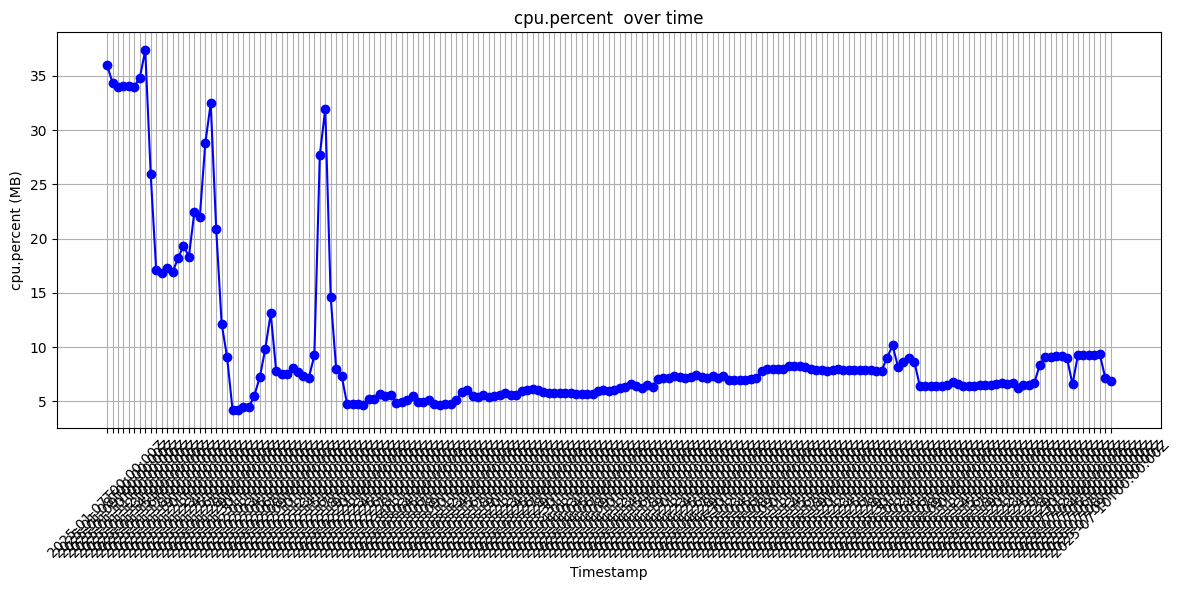

In [14]:
# Verileri görselleştirme Adımı
# Verileri görselleştirmek için matplotlib kütüphanesini kullanacağız.
# İlk olarak, gelen verilerden istatistikleri alacağız ve ardından
# bu verileri zaman serisi grafiği olarak çizeceğiz.
# Bu grafik, bellek kullanımının zaman içindeki değişimini gösterecektir.
# Ayrıca, toplam veri noktası sayısını da ekrana yazdıracağız.
import matplotlib.pyplot as plt
data = result[0]
data_points = result[0]['statistics']
print("Toplam veri noktası sayısı:", len(data_points))
metric_name = data['name']  # Örn: mem.used_real_mb

timestamps = [stat[0] for stat in result[0]['statistics']]
values = [stat[1] for stat in result[0]['statistics']]
plt.figure(figsize=(12, 6))
plt.plot(timestamps, values, marker='o', linestyle='-', color='b')
plt.title(f'{metric_name}  over time')
plt.xlabel('Timestamp')
plt.ylabel(f'{metric_name} (MB)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
#Missing Values
# Bu kod, Monasca API'sinden alınan verilerdeki eksik günleri
# tespit etmek için kullanılacaktır.
# Monasca API'sinden alınan verilerdeki eksik günleri tespit etmek
# için, 365 günlük bir tarih aralığı oluşturacağız ve gelen verilerle
# karşılaştıracağız. Eksik günler, bu tarih aralığında olup da
# gelen verilerde bulunmayan günler olacaktır.
# Bu, veri analizi ve raporlama süreçlerinde eksik verilerin
# tespit edilmesine yardımcı olacaktır.
from datetime import datetime, timedelta

# Tarih listesi oluştur (beklenen)
expected_dates = set([
    (datetime.utcnow() - timedelta(days=i)).strftime("%Y-%m-%d")
    for i in range(365)
])

# Gelen veri tarihleri
actual_dates = set([
    row[0][:10]  # '2025-01-07T00:00:00Z' → '2025-01-07'
    for row in result[0]['statistics']
])

# Eksik olanlar
missing_dates = sorted(expected_dates - actual_dates)

print("Eksik gün sayısı:", len(missing_dates))
print("Eksik tarihler:")
for d in missing_dates:
    print(d)


Eksik gün sayısı: 180
Eksik tarihler:
2024-07-11
2024-07-12
2024-07-13
2024-07-14
2024-07-15
2024-07-16
2024-07-17
2024-07-18
2024-07-19
2024-07-20
2024-07-21
2024-07-22
2024-07-23
2024-07-24
2024-07-25
2024-07-26
2024-07-27
2024-07-28
2024-07-29
2024-07-30
2024-07-31
2024-08-01
2024-08-02
2024-08-03
2024-08-04
2024-08-05
2024-08-06
2024-08-07
2024-08-08
2024-08-09
2024-08-10
2024-08-11
2024-08-12
2024-08-13
2024-08-14
2024-08-15
2024-08-16
2024-08-17
2024-08-18
2024-08-19
2024-08-20
2024-08-21
2024-08-22
2024-08-23
2024-08-24
2024-08-25
2024-08-26
2024-08-27
2024-08-28
2024-08-29
2024-08-30
2024-08-31
2024-09-01
2024-09-02
2024-09-03
2024-09-04
2024-09-05
2024-09-06
2024-09-07
2024-09-08
2024-09-09
2024-09-10
2024-09-11
2024-09-12
2024-09-13
2024-09-14
2024-09-15
2024-09-16
2024-09-17
2024-09-18
2024-09-19
2024-09-20
2024-09-21
2024-09-22
2024-09-23
2024-09-24
2024-09-25
2024-09-26
2024-09-27
2024-09-28
2024-09-29
2024-09-30
2024-10-01
2024-10-02
2024-10-03
2024-10-04
2024-10-05
2024-

### Model Eğitme


MAE: 4.54
MSE: 40.65
RMSE: 6.38
R²: 0.2130


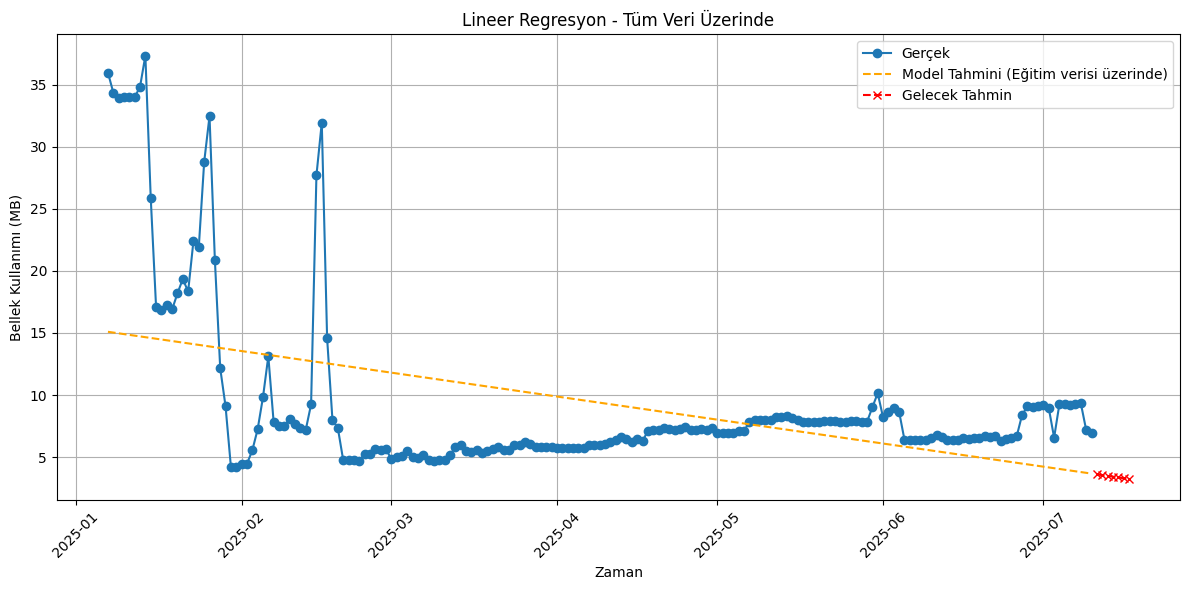

In [16]:
# Lineer Regresyon ile Tahmin
# Bu adımda, Monasca API'sinden alınan verileri kullanarak
# lineer regresyon modeli oluşturacağız. Model, zaman serisi verilerini
# kullanarak bellek kullanımını tahmin edecektir. Modelin performansını
# değerlendirmek için çeşitli metrikler kullanacağız. Ayrıca, modelin
# gelecekteki 7 gün için tahmin yapmasını sağlayacağız ve bu tahminleri
# görselleştireceğiz. Bu, modelin doğruluğunu ve güvenilirliğini
# değerlendirmemize yardımcı olacaktır.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Eğer timestamp'ler string ise datetime objesine çevir
if isinstance(timestamps[0], str):
    timestamps = [datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ") for t in timestamps]

# 1. Zamanı sayısallaştır
timestamps_numeric = np.array([i.timestamp() for i in timestamps]).reshape(-1, 1)
values_numeric = np.array(values).reshape(-1, 1)

# 2. Tüm veriyle eğit
model = LinearRegression()
model.fit(timestamps_numeric, values_numeric)

# 3. Aynı veri üzerinde tahmin yap
y_pred = model.predict(timestamps_numeric)

# 4. Performans metrikleri
mae = mean_absolute_error(values_numeric, y_pred)
mse = mean_squared_error(values_numeric, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(values_numeric, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 5. Gelecek 7 gün için tahmin
day_seconds = 86400
future_seconds = np.array([
    timestamps_numeric[-1][0] + i * day_seconds for i in range(1, 8)
]).reshape(-1, 1)
future_predictions = model.predict(future_seconds)
future_times = [timestamps[-1] + timedelta(days=i) for i in range(1, 8)]

# 6. Grafik
plt.figure(figsize=(12, 6))
plt.plot(timestamps, values, label="Gerçek", marker="o")
plt.plot(timestamps, y_pred, label="Model Tahmini (Eğitim verisi üzerinde)", linestyle="--", color="orange")
plt.plot(future_times, future_predictions, label="Gelecek Tahmin", marker="x", linestyle="--", color="red")
plt.xlabel("Zaman")
plt.ylabel("Bellek Kullanımı (MB)")
plt.title("Lineer Regresyon - Tüm Veri Üzerinde")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


MAE: 3.62
MSE: 24.50
RMSE: 4.95
R²: 0.5255


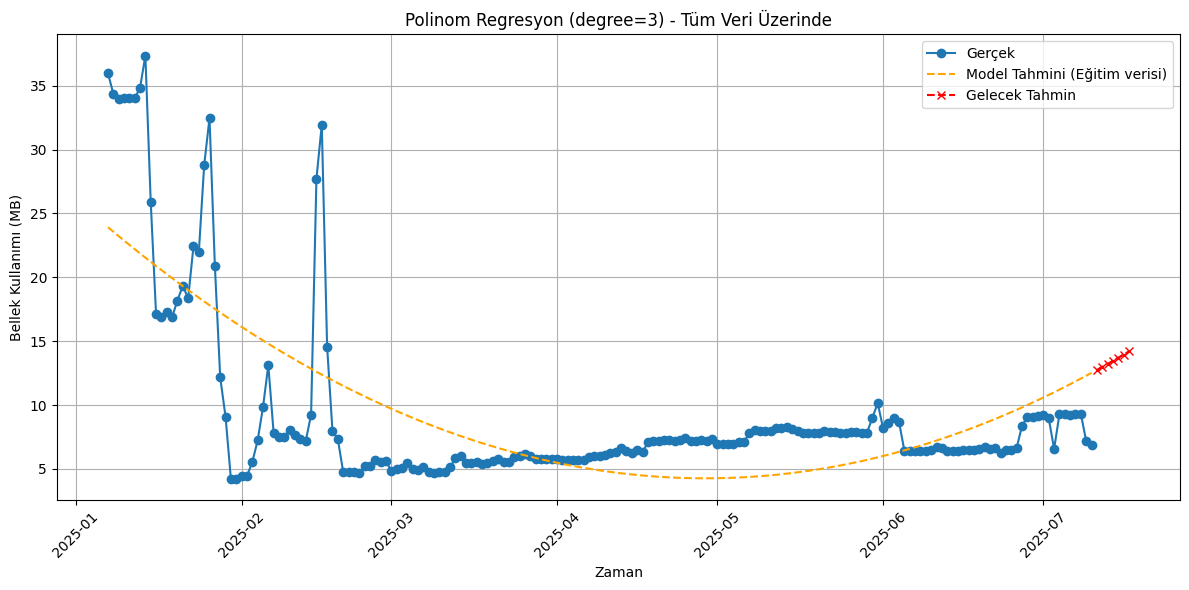

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
# Eğer timestamp'ler string ise datetime objesine çevir
if isinstance(timestamps[0], str):
    timestamps = [datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ") for t in timestamps]

# 1. Zamanı sayısallaştır
timestamps_numeric = np.array([i.timestamp() for i in timestamps]).reshape(-1, 1)
values_numeric = np.array(values).reshape(-1, 1)

# 2. Modeli eğit (tüm veriyle)
degree = 3  # Polinom derecesi
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(timestamps_numeric, values_numeric)

# 3. Tahmin (aynı veride)
y_pred = model.predict(timestamps_numeric)

# 4. Performans metrikleri
mae = mean_absolute_error(values_numeric, y_pred)
mse = mean_squared_error(values_numeric, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(values_numeric, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 5. Gelecek 7 gün için tahmin
day_seconds = 86400
future_seconds = np.array([
    timestamps_numeric[-1][0] + i * day_seconds for i in range(1, 8)
]).reshape(-1, 1)
future_predictions = model.predict(future_seconds)
future_times = [timestamps[-1] + timedelta(days=i) for i in range(1, 8)]

# 6. Grafik
plt.figure(figsize=(12, 6))
plt.plot(timestamps, values, label="Gerçek", marker="o")
plt.plot(timestamps, y_pred, label="Model Tahmini (Eğitim verisi)", linestyle="--", color="orange")
plt.plot(future_times, future_predictions, label="Gelecek Tahmin", marker="x", linestyle="--", color="red")
plt.xlabel("Zaman")
plt.ylabel("Bellek Kullanımı (MB)")
plt.title(f"Polinom Regresyon (degree={degree}) - Tüm Veri Üzerinde")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


05:49:38 - cmdstanpy - INFO - Chain [1] start processing
05:49:38 - cmdstanpy - INFO - Chain [1] done processing


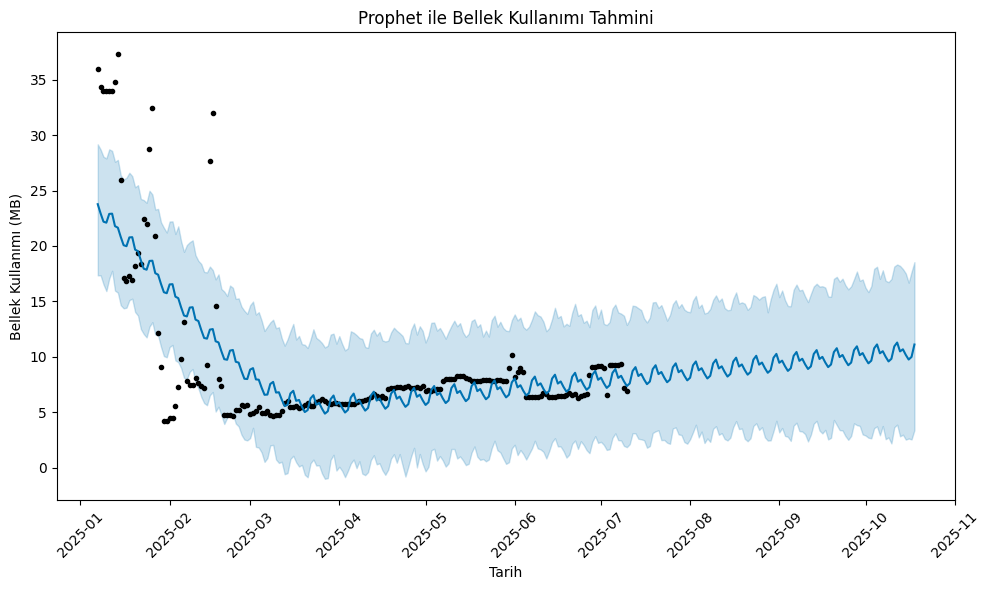

📊 Prophet Performans Metrikleri (Geçmiş Veri Üzerinde):
➡️ MAE:  2.70
➡️ MSE:  20.25
➡️ RMSE: 4.50
➡️ R²:   0.6078

📅 Gelecek 7 Günlük Tahminler:
2025-09-29 → Tahmin: 10.15 MB (Alt: 3.77, Üst: 16.85)
2025-09-30 → Tahmin: 10.33 MB (Alt: 3.00, Üst: 16.98)
2025-10-01 → Tahmin: 9.83 MB (Alt: 2.90, Üst: 16.24)
2025-10-02 → Tahmin: 9.41 MB (Alt: 2.70, Üst: 15.84)
2025-10-03 → Tahmin: 9.65 MB (Alt: 2.64, Üst: 16.37)
2025-10-04 → Tahmin: 10.77 MB (Alt: 3.57, Üst: 17.93)
2025-10-05 → Tahmin: 11.11 MB (Alt: 3.72, Üst: 18.12)
2025-10-06 → Tahmin: 10.32 MB (Alt: 2.92, Üst: 17.03)
2025-10-07 → Tahmin: 10.50 MB (Alt: 3.75, Üst: 17.80)
2025-10-08 → Tahmin: 10.00 MB (Alt: 2.57, Üst: 16.86)
2025-10-09 → Tahmin: 9.58 MB (Alt: 2.72, Üst: 16.74)
2025-10-10 → Tahmin: 9.82 MB (Alt: 2.18, Üst: 17.02)
2025-10-11 → Tahmin: 10.94 MB (Alt: 3.64, Üst: 18.14)
2025-10-12 → Tahmin: 11.29 MB (Alt: 3.88, Üst: 18.33)
2025-10-13 → Tahmin: 10.49 MB (Alt: 2.83, Üst: 18.20)
2025-10-14 → Tahmin: 10.68 MB (Alt: 2.97, Üst: 17

In [18]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. timestamps string mi? kontrol et
if isinstance(timestamps[0], str):
    timestamps = [datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ") for t in timestamps]

# 2. Prophet için DataFrame hazırla
df = pd.DataFrame({
    'ds': timestamps,
    'y': values
})

# 3. Prophet modeli eğit
model = Prophet(daily_seasonality=False)
model.fit(df)

# 4. Gelecek 7 gün dahil olmak üzere tarihleri hazırla
future = model.make_future_dataframe(periods=100)  # 1000 gün ileriye dönük tahmin
forecast = model.predict(future)

# 5. Grafik
fig = model.plot(forecast)
plt.title("Prophet ile Bellek Kullanımı Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Bellek Kullanımı (MB)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 6. METRİKLER — Sadece geçmiş veriyle kıyaslayarak

# Gerçek değerler (y) ve model tahmini (yhat) eşleşen tarihler
merged = df.merge(forecast[['ds', 'yhat']], on='ds')

y_true = merged['y'].values
y_pred = merged['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("📊 Prophet Performans Metrikleri (Geçmiş Veri Üzerinde):")
print(f"➡️ MAE:  {mae:.2f}")
print(f"➡️ MSE:  {mse:.2f}")
print(f"➡️ RMSE: {rmse:.2f}")
print(f"➡️ R²:   {r2:.4f}")

# 7. Son 7 gün tahminlerini yazdır
print("\n📅 Gelecek 7 Günlük Tahminler:")
future_7 = forecast.tail(20)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
for row in future_7.itertuples(index=False):
    print(f"{row.ds.strftime('%Y-%m-%d')} → Tahmin: {row.yhat:.2f} MB "
          f"(Alt: {row.yhat_lower:.2f}, Üst: {row.yhat_upper:.2f})")
